<a href="https://colab.research.google.com/github/ArpitaChatterjee/DiseaseDetection/blob/main/DiseaseClassification(mod).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install tensorflow-gpu

In [20]:
!nvidia-smi

Mon Nov  9 14:24:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    30W /  70W |   8803MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [24]:
#import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
#resize img
IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/valid'

In [5]:
#import inceptionv3 library and add preprocesssing layer to the front of the vgg

inception = InceptionV3(input_shape=IMAGE_SIZE+[3], weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
#not train existing wt
for layer in inception.layers:
  layer.trainable = False

In [7]:
#to get no of output class
folders = glob('/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train/*')

In [9]:
folders

['/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/M

In [10]:
#flatten the layer
x= Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
#create model obj
model = Model(inputs=inception.input, outputs=prediction)

#view structure of model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [13]:
#provide info to model about what cost n optimization mth to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [14]:
#use IDG to scale dataset always rescale and do other modification with the train dataset not the test data set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range= 0.2,
                                   zoom_range =0.2,
                                   horizontal_flip= True)
test_datagen =ImageDataGenerator(rescale= 1./255)

In [15]:
#provide same target size as initialized for the img size
train_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/train',
                                              target_size = (224, 224),
                                              batch_size = 16,
                                              class_mode = 'categorical')

Found 18355 images belonging to 10 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/DiseaseClassificationModel/New Plant Diseases Dataset(Augmented)/valid',
                                              target_size = (224, 224),
                                              batch_size = 16,
                                              class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [25]:
#to get accuracy
r= model.fit_generator(
    train_set, 
    validation_data = test_set,
    epochs= 8,
    steps_per_epoch = len(train_set),
    validation_steps = len(test_set)
)

Epoch 1/8
1148/1148 [==============================] - 511s 445ms/step - loss: 3.2817 - accuracy: 0.8160 - val_loss: 4.7357 - val_accuracy: 0.7860
Epoch 2/8
1148/1148 [==============================] - 261s 228ms/step - loss: 3.0864 - accuracy: 0.8417 - val_loss: 5.2873 - val_accuracy: 0.7721
Epoch 3/8
1148/1148 [==============================] - 258s 225ms/step - loss: 3.0579 - accuracy: 0.8508 - val_loss: 3.6728 - val_accuracy: 0.8242
Epoch 4/8
1148/1148 [==============================] - 254s 222ms/step - loss: 3.0352 - accuracy: 0.8604 - val_loss: 3.7823 - val_accuracy: 0.8366
Epoch 5/8
1148/1148 [==============================] - 253s 220ms/step - loss: 2.6770 - accuracy: 0.8776 - val_loss: 4.9660 - val_accuracy: 0.8105
Epoch 6/8
1148/1148 [==============================] - 251s 218ms/step - loss: 2.7757 - accuracy: 0.8784 - val_loss: 4.0030 - val_accuracy: 0.8358
Epoch 7/8
1148/1148 [==============================] - 252s 220ms/step - loss: 2.5361 - accuracy: 0.8865 - val_loss: 3

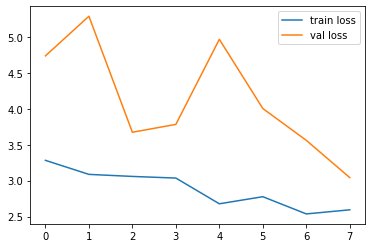

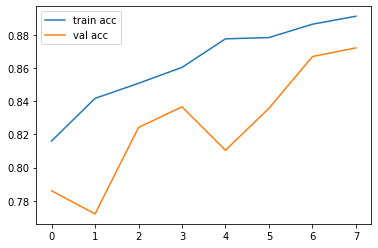

<Figure size 432x288 with 0 Axes>

In [33]:

import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
#save it as h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [51]:
y_pred = model.predict(test_set)
y_pred

array([[0.0000000e+00, 2.5637917e-13, 1.8707135e-30, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.7461285e-20, 6.4070584e-35, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [5.8189485e-08, 1.7274090e-24, 0.0000000e+00, ..., 6.1196171e-32,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [52]:
y_pred = np.argmax(y_pred, axis=None)
y_pred

3

In [53]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [55]:
#using tensorflow keras 
#model=load_model('model_resnet50.h5')
#img_data